<a href="https://colab.research.google.com/github/farahinamir/Master-Project/blob/main/House%20Property%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Assignment/ResaleflatpricesbasedonregistrationdatefromJan2017- 30 June 2025.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Data Preprocessing & Preparation

#### Original Data Overview

In [ ]:
# Data Overview
print("="*80)
print("DATA OVERVIEW")
print("="*80)
print(f"Total records in dataset: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn names and data types:")
print(df.dtypes)

DATA OVERVIEW
Total records in dataset: 210,021
Number of columns: 11

Column names and data types:
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object


In [ ]:
print("\nFirst 5 rows of data:")
df.head()


First 5 rows of data:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
print("Check for Missing Values:")
df.isnull().sum()

Check for Missing Values:


,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


#### Data Preprocessing

In [ ]:
import numpy as np

# Convert 'month' to datetime
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month
df.drop(columns=['month'], inplace=True)

In [ ]:
# Convert 'remaining_lease' to total months
def lease_to_months(lease_str):
    try:
        parts = lease_str.lower().replace("years", "").replace("year", "").replace("months", "").replace("month", "").split()
        years = int(parts[0]) if len(parts) > 0 else 0
        months = int(parts[1]) if len(parts) > 1 else 0
        return years * 12 + months
    except:
        return np.nan

df['remaining_lease_months'] = df['remaining_lease'].apply(lease_to_months)

# Drop original 'remaining_lease'
df.drop(columns=['remaining_lease'], inplace=True)

df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_num,remaining_lease_months
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,2017,1,736
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,2017,1,727
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,2017,1,749
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,2017,1,745
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,2017,1,749
...,...,...,...,...,...,...,...,...,...,...,...,...
210016,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0,2025,2,744
210017,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,988000.0,2025,4,741
210018,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0,2025,4,741
210019,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0,2025,5,741


In [ ]:
# Calculate flat age
current_year = 2025
df['flat_age'] = current_year - df['lease_commence_date']

# Drop original 'lease_commence_date'
df.drop(columns=['lease_commence_date'], inplace=True)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,flat_age
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,61 years 04 months,232000.0,46
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,60 years 07 months,250000.0,47
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62 years 05 months,262000.0,45
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,62 years 01 month,265000.0,45
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62 years 05 months,265000.0,45
...,...,...,...,...,...,...,...,...,...,...,...
210016,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,62 years,1100888.0,37
210017,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,61 years 09 months,988000.0,38
210018,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,61 years 09 months,975000.0,37
210019,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,61 years 09 months,1000000.0,37


In [ ]:
# Drop unnecessary columns (very specific to building & not contribute meaningfully)
df.drop(columns=['block', 'street_name'], inplace=True)

In [ ]:
df

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,flat_age
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,61 years 04 months,232000.0,46
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,60 years 07 months,250000.0,47
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,262000.0,45
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,62 years 01 month,265000.0,45
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,265000.0,45
...,...,...,...,...,...,...,...,...,...
210016,2025-02,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,62 years,1100888.0,37
210017,2025-04,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,61 years 09 months,988000.0,38
210018,2025-04,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,61 years 09 months,975000.0,37
210019,2025-05,YISHUN,EXECUTIVE,04 TO 06,142.0,Apartment,61 years 09 months,1000000.0,37


##### Label Encoding for Ordinal Categorical Variables (storey_range and flat_type)

In [ ]:
# Define ordinal order
storey_order = ['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18',
    '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36',
    '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']

flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Create mapping dicts
storey_mapping = {val: idx for idx, val in enumerate(storey_order)}
flat_type_mapping = {val: idx for idx, val in enumerate(flat_type_order)}

# Apply mappings
df['storey_range_encoded'] = df['storey_range'].map(storey_mapping)
df['flat_type_encoded'] = df['flat_type'].map(flat_type_mapping)

df.drop(columns=['storey_range', 'flat_type'], inplace=True)

In [ ]:
df

,town,floor_area_sqm,flat_model,remaining_lease,resale_price,flat_age,storey_range_encoded,flat_type_encoded,year,month_num
0,ANG MO KIO,44.0,Improved,61 years 04 months,232000.0,46,3,1,2017,1
1,ANG MO KIO,67.0,New Generation,60 years 07 months,250000.0,47,0,2,2017,1
2,ANG MO KIO,67.0,New Generation,62 years 05 months,262000.0,45,0,2,2017,1
3,ANG MO KIO,68.0,New Generation,62 years 01 month,265000.0,45,1,2,2017,1
4,ANG MO KIO,67.0,New Generation,62 years 05 months,265000.0,45,0,2,2017,1
...,...,...,...,...,...,...,...,...,...,...
210016,YISHUN,146.0,Maisonette,62 years,1100888.0,37,3,5,2025,2
210017,YISHUN,142.0,Apartment,61 years 09 months,988000.0,38,2,5,2025,4
210018,YISHUN,146.0,Maisonette,61 years 09 months,975000.0,37,1,5,2025,4
210019,YISHUN,142.0,Apartment,61 years 09 months,1000000.0,37,1,5,2025,5


##### One-Hot Encoding for Nominal Categorical Variables (town, flat_model)

In [ ]:
# One-hot encode for nominal categorical variables
nominal_cols = ['town', 'flat_model']
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Show result
print("New shape after encoding:", df_encoded.shape)

New shape after encoding: (210021, 53)


In [ ]:
df_encoded.head()

In [ ]:
df_encoded.dtypes

#### Feature Selection

In [ ]:
# Correlation with resale_price
correlation = df_encoded.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)
print(correlation)

In [ ]:
threshold = 0.1
selected_features = correlation[abs(correlation) >= threshold].index.tolist()

# Remove the target from the list
selected_features.remove('resale_price')

print("Selected features based on correlation threshold:")
print(selected_features)

In [ ]:
selected_features

In [ ]:
df_encoded[selected_features]

In [ ]:
df_encoded['resale_price']

### Train & Evaluate the Models

#### Split Train-Test

In [ ]:
X = df_encoded[selected_features]
y = df_encoded['resale_price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X-train: ', X_train.shape)
print('y-train: ', y_train.shape)
print()
print('X-test: ', X_test.shape)
print('y-test: ', y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['floor_area_sqm', 'flat_age', 'remaining_lease_months']
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

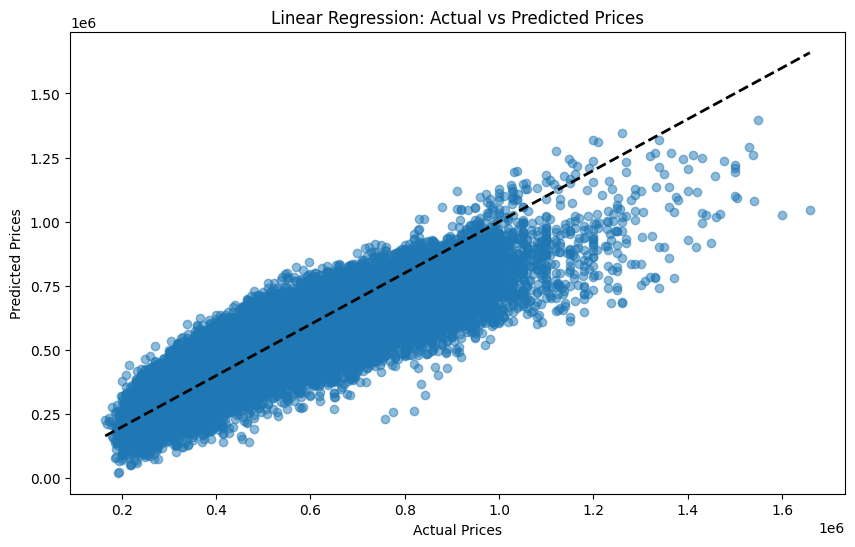

In [ ]:
# prompt: visualize linear

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#### Model Evaluations

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

results = {
    'LinearRegression': evaluate(y_test, y_pred_lr),
    'RandomForestRegressor': evaluate(y_test, y_pred_rf),
    'XGBoostRegressor': evaluate(y_test, y_pred_xgb)
}

# Comparison Table
results_df = pd.DataFrame(results, index=['RMSE', 'MAE', 'R²']).T

# Optionally round the values for better readability
results_df = results_df.round({'RMSE': 2, 'MAE': 2, 'R²': 4})

# Display the table
print(results_df)

                           RMSE       MAE      R²
LinearRegression       91733.39  67722.33  0.7494
RandomForestRegressor  70798.82  46643.66  0.8507
XGBoostRegressor       66815.21  45803.22  0.8671


Based on the result, XGBoost Regressor is the best model with low RMSE and MAE, and highest R²

### Clustering for Attribute Selection

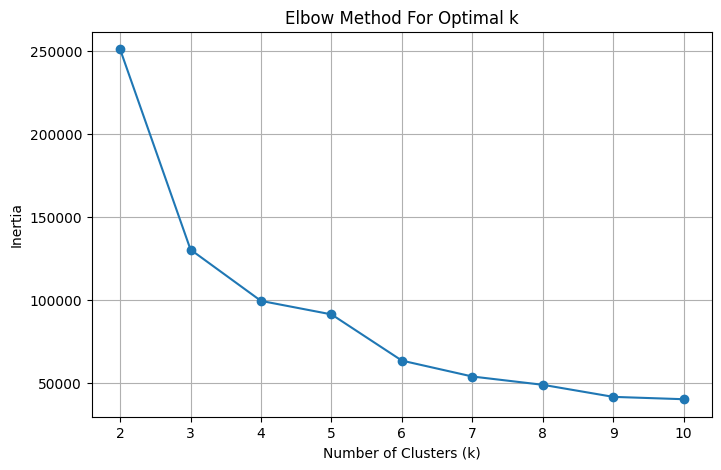

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[num_cols])

# Determine optimal clusters
inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train[num_cols])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(2, 11), inertias, curve='convex', direction='decreasing')
print("Best k (elbow point):", kl.elbow)

Best k (elbow point): 6


In [ ]:
# Based on elbow method, choose k=6
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_train[num_cols])

# Add cluster labels as new feature
X_train['cluster'] = clusters
X_test['cluster'] = kmeans.predict(X_test[num_cols])

In [ ]:
# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': clusters,
    'Resale_Price': y_train
})

# Explained variance ratio
print(f"Explained variance: PC1 = {pca.explained_variance_ratio_[0]:.2f}, PC2 = {pca.explained_variance_ratio_[1]:.2f}")

Explained variance: PC1 = 0.67, PC2 = 0.33


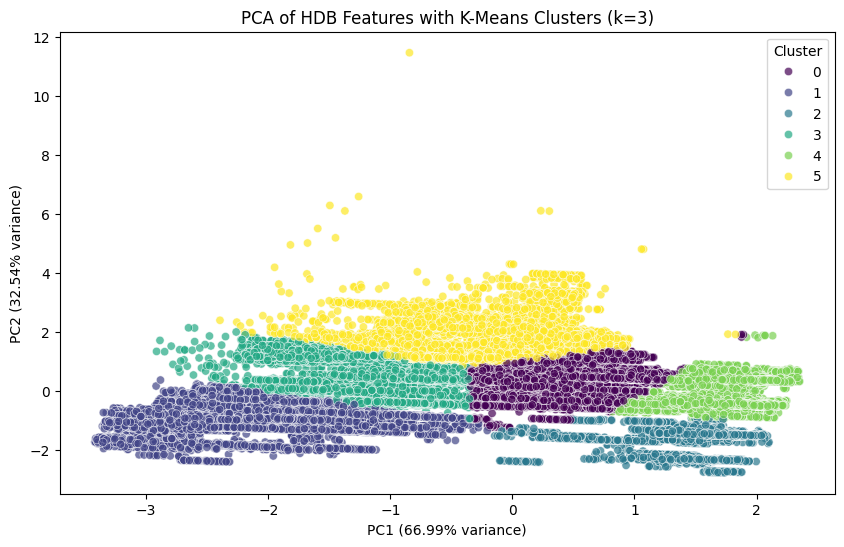

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('PCA of HDB Features with K-Means Clusters (k=3)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.show()

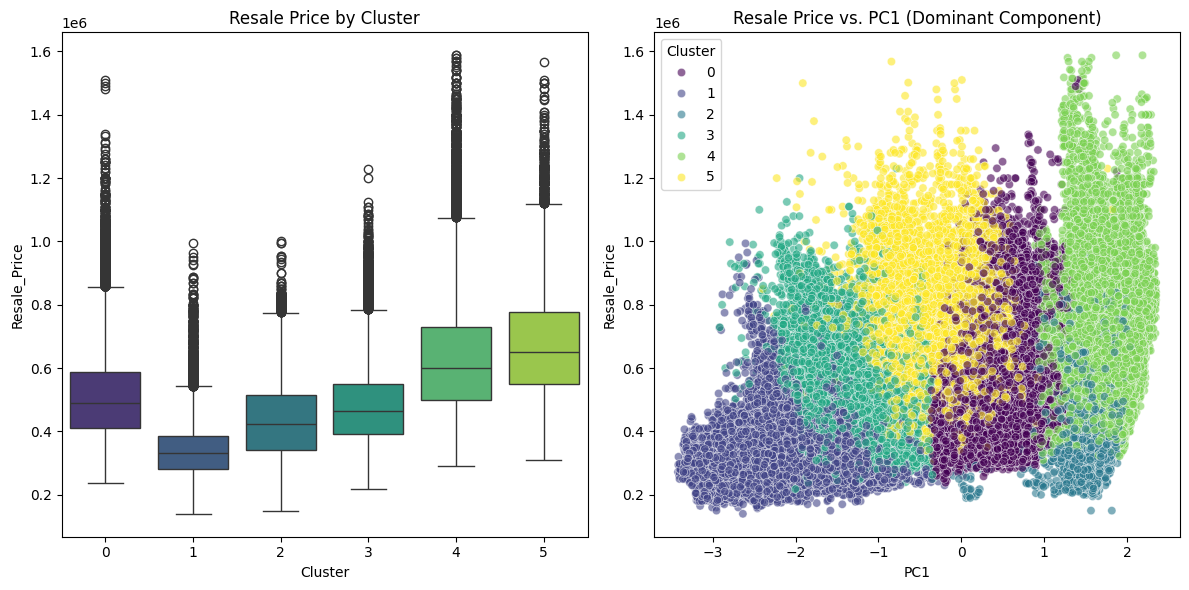

In [ ]:
plt.figure(figsize=(12, 6))

# Plot 1: Price distribution per cluster
plt.subplot(1, 2, 1)
sns.boxplot(data=plot_df, x='Cluster', y='Resale_Price', palette='viridis')
plt.title('Resale Price by Cluster')

# Plot 2: Price vs. PC1 (most important component)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='Resale_Price',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Resale Price vs. PC1 (Dominant Component)')
plt.tight_layout()
plt.show()

In [ ]:
X_train

In [ ]:
# Re-train XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb_with_cluster = xgb.predict(X_test)

# Evaluation
new_rmse, new_mae, new_r2 = evaluate(y_test, y_pred_xgb_with_cluster)
print(f"XGBoost with Cluster Feature -> RMSE: {new_rmse:.2f}, MAE: {new_mae:.2f}, R²: {new_r2:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Best parameters
best_params = grid_search.best_params_
print("\nBest parameters:", best_params)

# Final evaluation
best_xgb = grid_search.best_estimator_
final_results = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("\nOptimized XGBoost:")
for metric, value in final_results.items():
    print(f"{metric}: {value:.4f}")


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}

Optimized XGBoost:
RMSE: 64293.4784
MAE: 43254.1282
R2: 0.8769
